In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()
df=sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['species'] = encoder.fit_transform(df['species'])

In [ ]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,2
67,5.8,2.7,4.1,1.0,1
55,5.7,2.8,4.5,1.3,1
124,6.7,3.3,5.7,2.1,2
43,5.0,3.5,1.6,0.6,0


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [ ]:
df.sample(10)

,sepal_width,petal_length,species
90,2.6,4.4,1
79,2.6,3.5,1
70,3.2,4.8,1
53,2.3,4.0,1
96,2.9,4.2,1
54,2.8,4.6,1
147,3.0,5.2,2
111,2.7,5.3,2
138,3.0,4.8,2
71,2.8,4.0,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

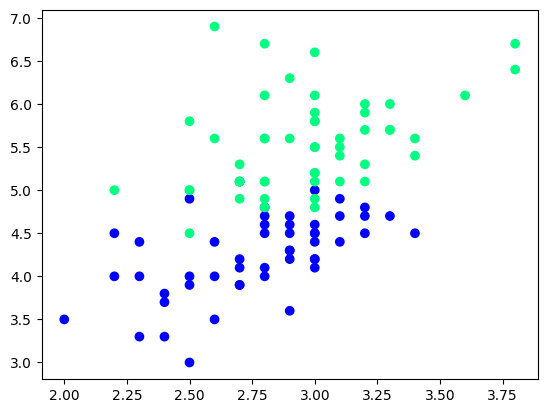

In [ ]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [ ]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [ ]:
df_train

,sepal_width,petal_length,species
132,2.8,5.6,2
143,3.2,5.9,2
99,2.8,4.1,1
137,3.1,5.5,2
123,2.7,4.9,2
107,2.9,6.3,2
146,2.5,5.0,2
130,2.8,6.1,2
90,2.6,4.4,1
74,2.9,4.3,1


In [ ]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:, -1].values

In [ ]:
y_test

array([1, 2, 1, 1, 1])

In [ ]:
X_test[0:5]

array([[2.8, 4.6],
       [2.5, 5.8],
       [2.6, 3.5],
       [3.4, 4.5],
       [2.8, 4. ]])

### Case 1 : Bagging

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
146,2.5,5.0,2
146,2.5,5.0,2
123,2.7,4.9,2
132,2.8,5.6,2
99,2.8,4.1,1
74,2.9,4.3,1
90,2.6,4.4,1
107,2.9,6.3,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [ ]:
def evaluate(clf,X,y):
  clf.fit(X,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values, y.values, clf=clf, legend=2)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_test,y_pred))

In [ ]:
dt_bag1 = DecisionTreeClassifier()

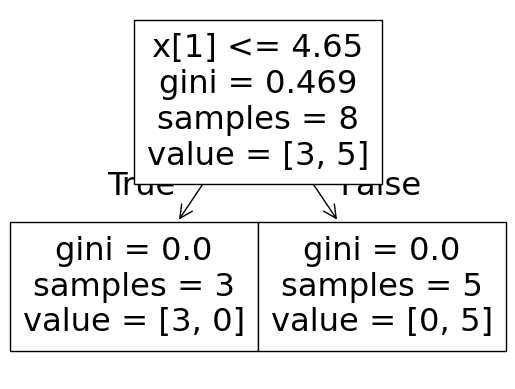

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


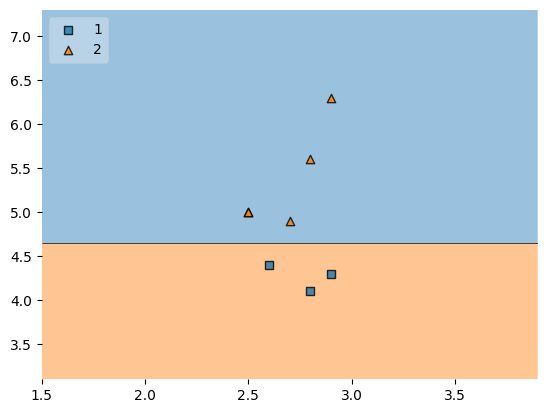

In [ ]:
evaluate(dt_bag1, X, y)

In [ ]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
143,3.2,5.9,2
99,2.8,4.1,1
123,2.7,4.9,2
146,2.5,5.0,2
99,2.8,4.1,1
143,3.2,5.9,2
74,2.9,4.3,1
137,3.1,5.5,2


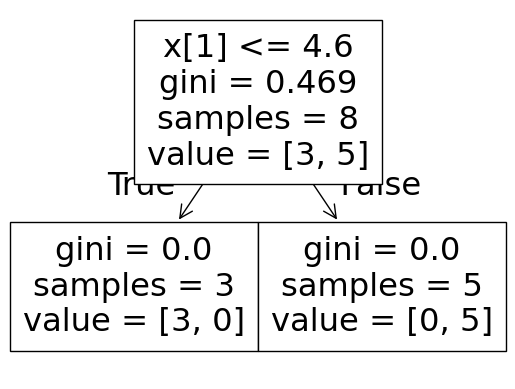

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


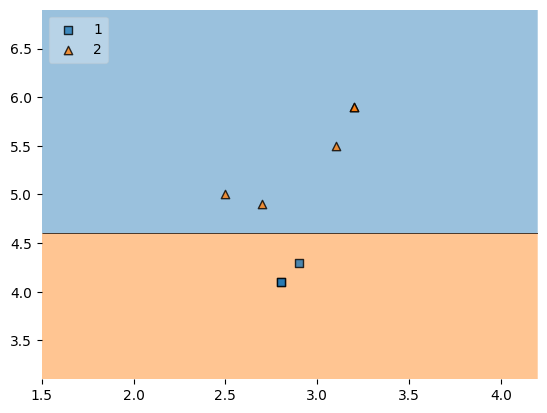

In [ ]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [ ]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
130,2.8,6.1,2
143,3.2,5.9,2
132,2.8,5.6,2
123,2.7,4.9,2
137,3.1,5.5,2
90,2.6,4.4,1
99,2.8,4.1,1
137,3.1,5.5,2


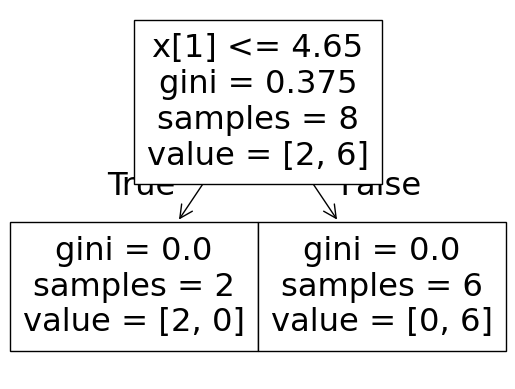

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


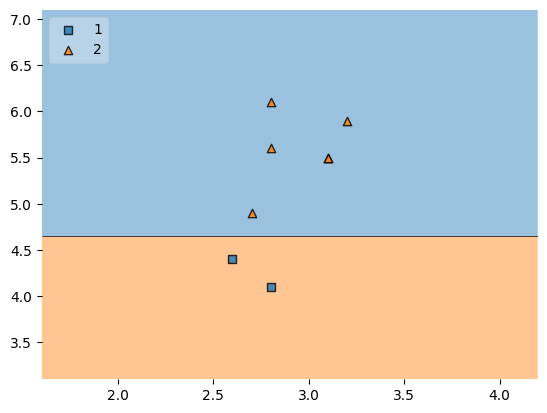

In [ ]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

### Predict

In [ ]:
df_test

,sepal_width,petal_length,species
110,3.2,5.1,2
116,3.0,5.5,2
82,2.7,3.9,1
135,3.0,6.1,2
148,3.4,5.4,2


In [ ]:
print("Predictor 1 :",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2 :",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3 :",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 : [2]
Predictor 2 : [2]
Predictor 3 : [2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Pasting

In [ ]:
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
132,2.8,5.6,2
143,3.2,5.9,2
99,2.8,4.1,1
137,3.1,5.5,2
123,2.7,4.9,2
107,2.9,6.3,2
146,2.5,5.0,2
130,2.8,6.1,2
90,2.6,4.4,1
74,2.9,4.3,1


In [ ]:
df_train.sample(8)

,sepal_width,petal_length,species
90,2.6,4.4,1
146,2.5,5.0,2
143,3.2,5.9,2
74,2.9,4.3,1
137,3.1,5.5,2
107,2.9,6.3,2
99,2.8,4.1,1
123,2.7,4.9,2


### Random Subspaces

In [ ]:
df = df.sample(10)

In [ ]:
df

,sepal_width,petal_length,species
135,3.0,6.1,2
76,2.8,4.8,1
84,3.0,4.5,1
133,2.8,5.1,2
59,2.7,3.9,1
99,2.8,4.1,1
77,3.0,5.0,1
130,2.8,6.1,2
79,2.6,3.5,1
52,3.1,4.9,1


In [ ]:
# column sampling with replacement default replacement is False
df.sample(2,replace=True,axis=1)

,sepal_width,petal_length
135,3.0,6.1
76,2.8,4.8
84,3.0,4.5
133,2.8,5.1
59,2.7,3.9
99,2.8,4.1
77,3.0,5.0
130,2.8,6.1
79,2.6,3.5
52,3.1,4.9


### Random Patches

In [ ]:
df

,sepal_width,petal_length,species
135,3.0,6.1,2
76,2.8,4.8,1
84,3.0,4.5,1
133,2.8,5.1,2
59,2.7,3.9,1
99,2.8,4.1,1
77,3.0,5.0,1
130,2.8,6.1,2
79,2.6,3.5,1
52,3.1,4.9,1


In [ ]:
# both row and column sampling
df.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal_width,petal_length
76,2.8,4.8
99,2.8,4.1
133,2.8,5.1
99,2.8,4.1
99,2.8,4.1
59,2.7,3.9
76,2.8,4.8
59,2.7,3.9
